In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tbparse import SummaryReader
from itertools import product

In [153]:
env_names = ["minigrid-unlock"]
algorithms = ["dqn"]

dfs = []

for env, algo in product(env_names, algorithms):
    log_dir = f"../data/{algo}_logs/{env}/DQN_1"
    reader = SummaryReader(log_dir, extra_columns={"dir_name"})
    data = reader.scalars

    dfs.append(data)

df = pd.concat(dfs)

In [130]:
df

,step,tag,value,dir_name
0,500,eval/mean_ep_length,426.799988,0/normal/128/logs/PPO_1
1,1000,eval/mean_ep_length,500.000000,0/normal/128/logs/PPO_1
2,1500,eval/mean_ep_length,283.399994,0/normal/128/logs/PPO_1
3,2000,eval/mean_ep_length,416.399994,0/normal/128/logs/PPO_1
4,2500,eval/mean_ep_length,315.600006,0/normal/128/logs/PPO_1
...,...,...,...,...
19575,90500,train/value_loss,107.085876,9/pretrain_combined/128/logs/PPO_1
19576,92500,train/value_loss,112.120926,9/pretrain_combined/128/logs/PPO_1
19577,94500,train/value_loss,99.728409,9/pretrain_combined/128/logs/PPO_1
19578,96500,train/value_loss,103.826950,9/pretrain_combined/128/logs/PPO_1


In [131]:
split_cols = df["dir_name"].str.split("/", expand=True)
df["seed"] = split_cols[0]
df["algorithm"] = split_cols[1]

In [132]:
df

,step,tag,value,dir_name,seed,algorithm
0,500,eval/mean_ep_length,426.799988,0/normal/128/logs/PPO_1,0,normal
1,1000,eval/mean_ep_length,500.000000,0/normal/128/logs/PPO_1,0,normal
2,1500,eval/mean_ep_length,283.399994,0/normal/128/logs/PPO_1,0,normal
3,2000,eval/mean_ep_length,416.399994,0/normal/128/logs/PPO_1,0,normal
4,2500,eval/mean_ep_length,315.600006,0/normal/128/logs/PPO_1,0,normal
...,...,...,...,...,...,...
19575,90500,train/value_loss,107.085876,9/pretrain_combined/128/logs/PPO_1,9,pretrain_combined
19576,92500,train/value_loss,112.120926,9/pretrain_combined/128/logs/PPO_1,9,pretrain_combined
19577,94500,train/value_loss,99.728409,9/pretrain_combined/128/logs/PPO_1,9,pretrain_combined
19578,96500,train/value_loss,103.826950,9/pretrain_combined/128/logs/PPO_1,9,pretrain_combined


In [133]:
df.loc[df["algorithm"] == "normal", "algorithm"] = "PPO"
df.loc[df["algorithm"] == "pretrain_combined", "algorithm"] = "PPO + Embedding Module (Combined)"
df.loc[df["algorithm"] == "pretrain_qloss", "algorithm"] = "PPO + Embedding Module (Q-loss)"

In [134]:
df

,step,tag,value,dir_name,seed,algorithm
0,500,eval/mean_ep_length,426.799988,0/normal/128/logs/PPO_1,0,PPO
1,1000,eval/mean_ep_length,500.000000,0/normal/128/logs/PPO_1,0,PPO
2,1500,eval/mean_ep_length,283.399994,0/normal/128/logs/PPO_1,0,PPO
3,2000,eval/mean_ep_length,416.399994,0/normal/128/logs/PPO_1,0,PPO
4,2500,eval/mean_ep_length,315.600006,0/normal/128/logs/PPO_1,0,PPO
...,...,...,...,...,...,...
19575,90500,train/value_loss,107.085876,9/pretrain_combined/128/logs/PPO_1,9,PPO + Embedding Module (Combined)
19576,92500,train/value_loss,112.120926,9/pretrain_combined/128/logs/PPO_1,9,PPO + Embedding Module (Combined)
19577,94500,train/value_loss,99.728409,9/pretrain_combined/128/logs/PPO_1,9,PPO + Embedding Module (Combined)
19578,96500,train/value_loss,103.826950,9/pretrain_combined/128/logs/PPO_1,9,PPO + Embedding Module (Combined)


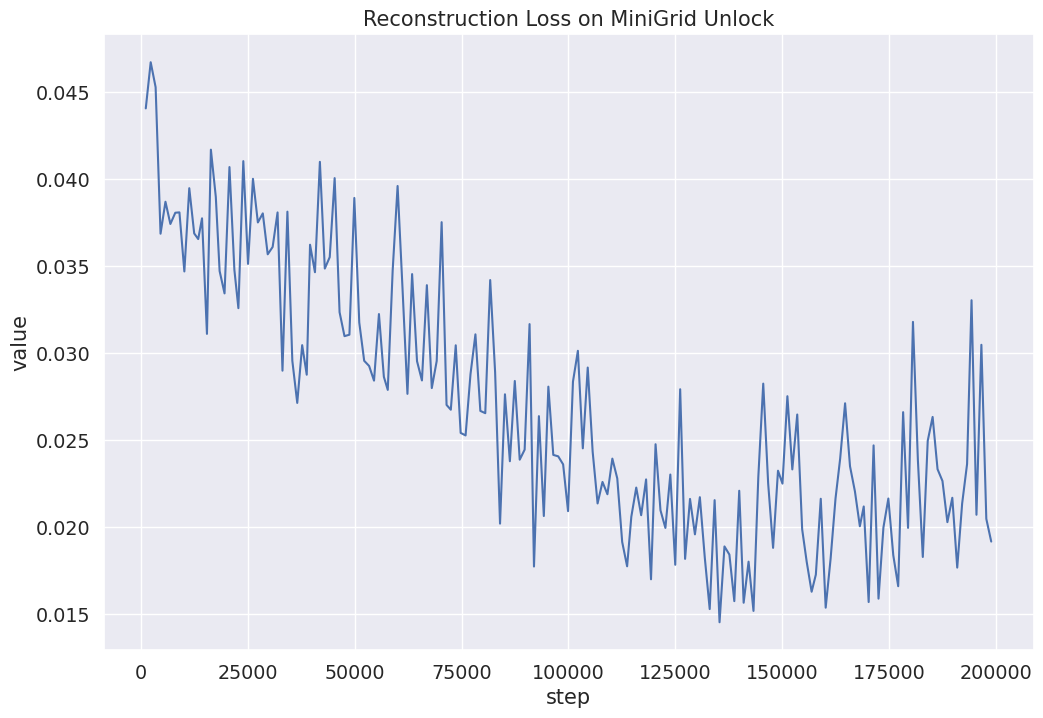

In [157]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df[df["tag"] == "train/reconstruction_loss"], y="value", x="step")
plt.grid(True)
plt.title("Reconstruction Loss on MiniGrid Unlock")
plt.savefig("../figures/dqn_reconstr_minigrid.png", dpi=300)
plt.savefig("../figures/dqn_reconstr_minigrid.pdf", bbox_inches="tight")

In [118]:
sns.set(font_scale=1.25)

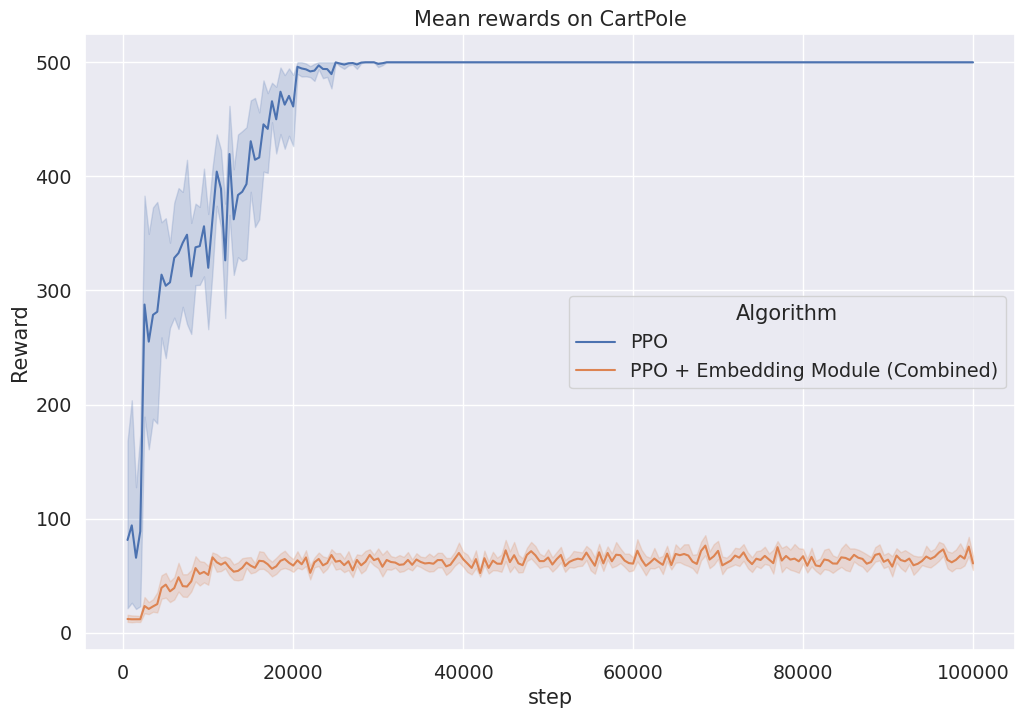

In [135]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df[(df["tag"] == "eval/mean_reward")], y="value", x="step", hue="algorithm")
plt.grid(True)
plt.title("Mean rewards on CartPole")
plt.ylabel("Reward")
plt.xlabel("step")
plt.legend(title="Algorithm")
plt.savefig("../figures/ppo_reward_cartpole.png", dpi=300)
plt.savefig("../figures/ppo_reward_cartpole.pdf", bbox_inches="tight")